In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data (1).csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [7]:
print("Column names:", df.columns)


Column names: Index(['Дата', 'Склад', 'Контрагент', 'Номенклатура', 'Количество'], dtype='object')


Сразу переведем столбец "Дата" в правильный формат

In [9]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()


Вывести несколько первых строк сгруппированных данных

In [12]:
print("Grouped data:")
print(grouped_df.head())

Grouped data (first few rows):
        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

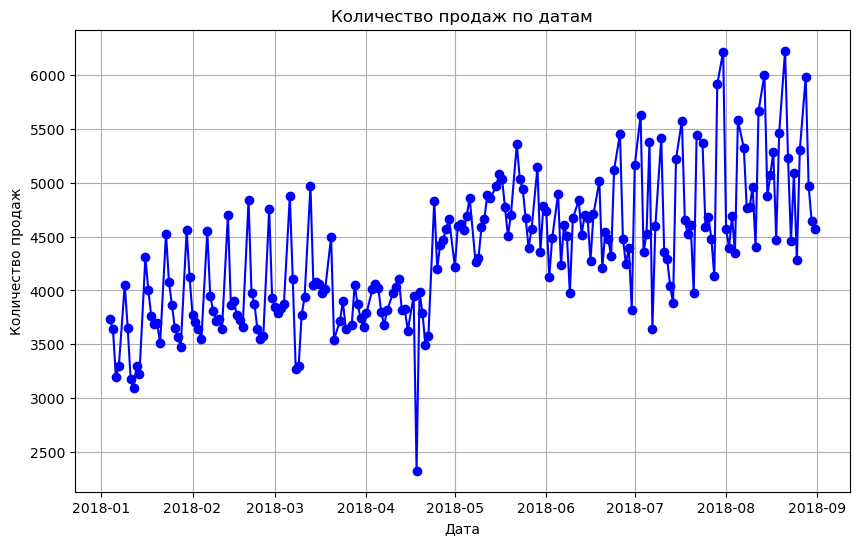

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='blue')
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)


Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [17]:
max_outlier = df.loc[df['Количество'].idxmax()]

print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [19]:
df['Месяц'] = df['Дата'].dt.month
df['День недели'] = df['Дата'].dt.day_name()

summer_wednesdays = df[(df['Склад'] == 3) & 
                       (df['Месяц'].isin([6, 7, 8])) & 
                       (df['День недели'] == 'Wednesday')]

top_product = summer_wednesdays.groupby('Номенклатура')['Количество'].sum().idxmax()
top_sales = summer_wednesdays.groupby('Номенклатура')['Количество'].sum().max()
print(f"Товар: {top_product}")

Товар: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [22]:

#архив не подключается :(
weather_file_path = '35188.19.11.2024.20.11.2024.1.0.0.ru.ansi.00000000 (1).csv'
weather_df = pd.read_csv(weather_file_path)

weather_df['Дата'] = pd.to_datetime(weather_df['Местное время (час)'], format='%d.%m.%Y %H:%M')

weather_df['Дата'] = weather_df['Дата'].dt.date
weather_df['T'] = pd.to_numeric(weather_df['T'], errors='coerce')
daily_weather_df = weather_df.groupby('Дата')['T'].mean().reset_index()
print (daily_weather_df)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 2: invalid continuation byte